In [140]:
import numpy as np
import pandas as pd

# load metadata of images
images = pd.DataFrame(pd.read_pickle("image_info.pkl"))

# load image embeddings
allVectors = pd.read_pickle("image_vectors.pkl")

In [141]:
image_name, vectors = zip(*allVectors.items())
embeddings = np.array(vectors)

In [142]:
from sklearn.metrics.pairwise import cosine_similarity
from autoencoder_resnet18 import img2vec
from PIL import Image

In [144]:
# path of input image
input_path = "/Volumes/T7 Shield/Downloads/football_image.jpeg"
I = Image.open(input_path)
# calculate embedding for input image
query_vector = img2vec.getVec(I)

In [145]:
# calculate similarity scores
scores = cosine_similarity([query_vector], embeddings)[0]

In [146]:
# Find the closest 10 vectors and their similarity scores
closest_indices = np.argsort(-scores)[:10]
closest_vectors = scores[closest_indices]

print("Indices of the 10 closest vectors:\n", closest_indices)
print("Similarity/Distance of the 10 closest vectors:\n", scores[closest_indices])

Indices of the 10 closest vectors:
 [54221  3501 81592 42863  9775 63244 65824 13573 32363  7569]
Similarity/Distance of the 10 closest vectors:
 [0.87839246 0.85399187 0.8298986  0.8232527  0.82183176 0.8188863
 0.81863296 0.8131139  0.78646266 0.7851776 ]


In [147]:
# find image names of the 10 most similar images
closest_image_names = [image_name[i] for i in closest_indices]
print("Namen der 10 ähnlichsten Bilder:\n", closest_image_names)

IDs der 10 ähnlichsten Bilder:
 ['ILSVRC2012_test_00065547.JPEG', 'ILSVRC2012_test_00093030.JPEG', 'ILSVRC2012_test_00058439.JPEG', 'ILSVRC2012_test_00066237.JPEG', 'ILSVRC2012_test_00079409.JPEG', 'ILSVRC2012_test_00090731.JPEG', 'ILSVRC2012_test_00036942.JPEG', 'ILSVRC2012_test_00035331.JPEG', 'ILSVRC2012_test_00092888.JPEG', 'ILSVRC2012_test_00001301.JPEG']


In [148]:
import matplotlib.pyplot as plt
import cv2
import os

# function to display an image
def show_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

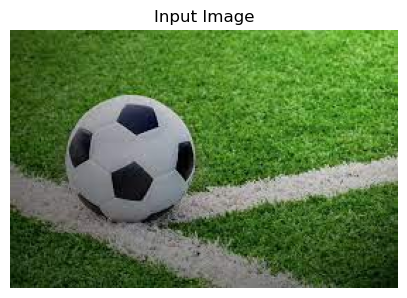

In [149]:
# display input image
show_image(input_path, "Input Image")

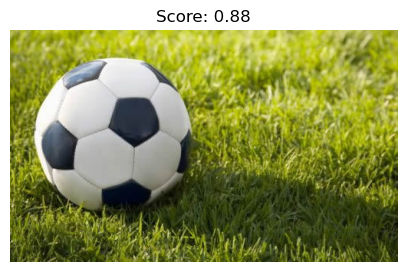

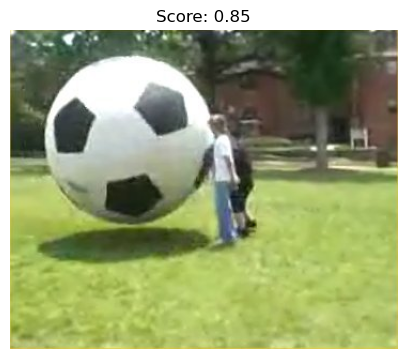

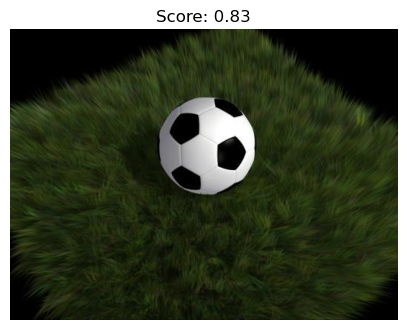

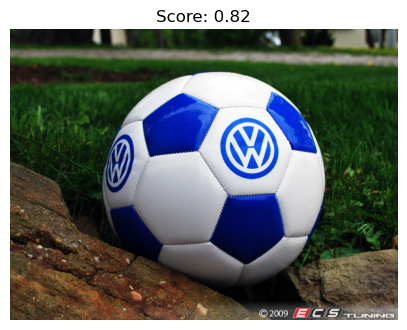

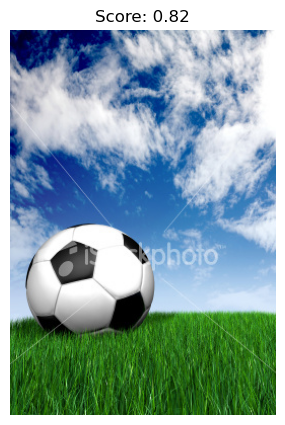

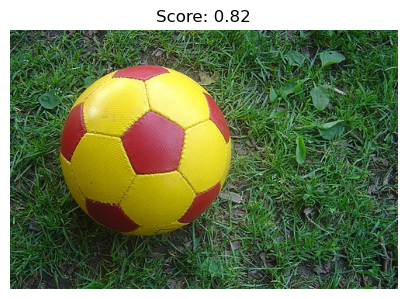

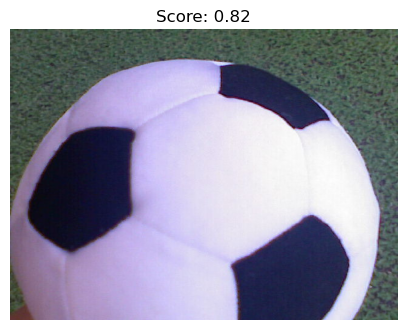

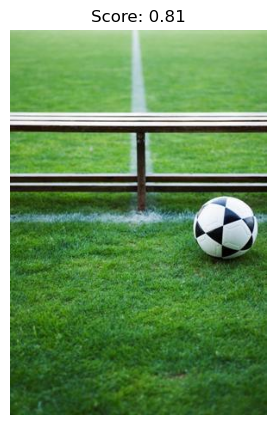

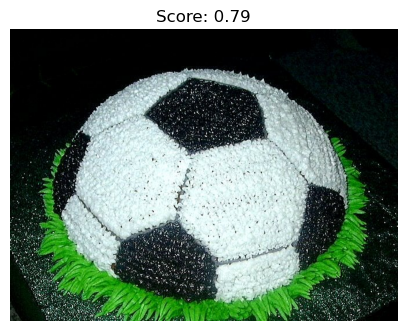

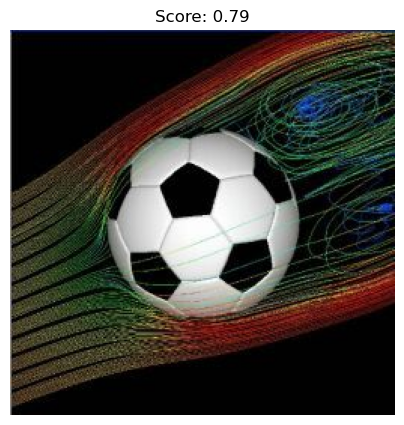

In [150]:
# Retrieve information of the most similar images from the CSV file
for i in range(10):
    closest_image_name = closest_image_names[i]
    closest_score = closest_vectors[i]
    
    # Retrieve information from the DataFrame using image names
    closest_image_info = images[images['file'] == closest_image_name].iloc[0]

    # Get image path and set title
    image_path = os.path.join(closest_image_info['root'], closest_image_info['file'])
    title = f"Score: {closest_score:.2f}"

    # Display the most similar image
    show_image(image_path, title)